## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.569917 -0.705440  1.110584 -1.423926  0.011143 -1.210488
1  1.651427 -1.576624 -0.481917 -1.176400  1.376617 -1.286077
2 -1.195245 -0.468886  1.028626 -0.105859 -1.683335 -1.221212
3  0.038348  1.337165 -0.660222 -1.494198 -0.467364 -0.253551
4  1.711163 -0.846548 -0.337007  0.379157  0.996046  0.526308


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9929704	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.9821457	total: 70ms	remaining: 34.9s
2:	learn: 0.9698991	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9594420	total: 71.2ms	remaining: 17.7s
4:	learn: 0.9491461	total: 71.7ms	remaining: 14.3s
5:	learn: 0.9397177	total: 72.4ms	remaining: 12s
6:	learn: 0.9284861	total: 72.9ms	remaining: 10.3s
7:	learn: 0.9202384	total: 73.4ms	remaining: 9.1s
8:	learn: 0.9106569	total: 74ms	remaining: 8.14s
9:	learn: 0.9010460	total: 74.5ms	remaining: 7.38s
10:	learn: 0.8922807	total: 75.1ms	remaining: 6.75s
11:	learn: 0.8823367	total: 75.5ms	remaining: 6.22s
12:	learn: 0.8727391	total: 76ms	remaining: 5.77s
13:	learn: 0.8626241	total: 76.4ms	remaining: 5.38s
14:	learn: 0.8547076	total: 77ms	remaining: 5.06s
15:	learn: 0.8454526	total: 77.5ms	remaining: 4.77s
16:	learn: 0.8377951	total: 78ms	remaining: 4.51s
17:	learn: 0.8286252	total: 78.5ms	remaining: 4.28s
18:	learn: 0.8204563	total: 79ms	remaining: 4.08s
19:	lea

84:	learn: 0.4491031	total: 108ms	remaining: 1.16s
85:	learn: 0.4458388	total: 109ms	remaining: 1.15s
86:	learn: 0.4421917	total: 109ms	remaining: 1.14s
87:	learn: 0.4384758	total: 109ms	remaining: 1.13s
88:	learn: 0.4348601	total: 110ms	remaining: 1.12s
89:	learn: 0.4313927	total: 111ms	remaining: 1.12s
90:	learn: 0.4275338	total: 112ms	remaining: 1.11s
91:	learn: 0.4237779	total: 112ms	remaining: 1.11s
92:	learn: 0.4203514	total: 113ms	remaining: 1.1s
93:	learn: 0.4167302	total: 113ms	remaining: 1.09s
94:	learn: 0.4132985	total: 114ms	remaining: 1.08s
95:	learn: 0.4101286	total: 114ms	remaining: 1.07s
96:	learn: 0.4072162	total: 115ms	remaining: 1.07s
97:	learn: 0.4041966	total: 115ms	remaining: 1.06s
98:	learn: 0.4008251	total: 115ms	remaining: 1.05s
99:	learn: 0.3979107	total: 116ms	remaining: 1.04s
100:	learn: 0.3948268	total: 116ms	remaining: 1.03s
101:	learn: 0.3913450	total: 117ms	remaining: 1.03s
102:	learn: 0.3878429	total: 117ms	remaining: 1.02s
103:	learn: 0.3852753	total: 

253:	learn: 0.1304980	total: 187ms	remaining: 549ms
254:	learn: 0.1297422	total: 188ms	remaining: 548ms
255:	learn: 0.1288119	total: 188ms	remaining: 547ms
256:	learn: 0.1280638	total: 189ms	remaining: 546ms
257:	learn: 0.1271887	total: 189ms	remaining: 545ms
258:	learn: 0.1262846	total: 190ms	remaining: 543ms
259:	learn: 0.1255381	total: 190ms	remaining: 542ms
260:	learn: 0.1247685	total: 191ms	remaining: 540ms
261:	learn: 0.1237825	total: 191ms	remaining: 539ms
262:	learn: 0.1230092	total: 192ms	remaining: 538ms
263:	learn: 0.1221714	total: 192ms	remaining: 536ms
264:	learn: 0.1212923	total: 193ms	remaining: 535ms
265:	learn: 0.1205198	total: 194ms	remaining: 534ms
266:	learn: 0.1197134	total: 194ms	remaining: 533ms
267:	learn: 0.1190339	total: 195ms	remaining: 531ms
268:	learn: 0.1182598	total: 195ms	remaining: 530ms
269:	learn: 0.1173921	total: 195ms	remaining: 528ms
270:	learn: 0.1166269	total: 196ms	remaining: 527ms
271:	learn: 0.1158239	total: 196ms	remaining: 526ms
272:	learn: 

470:	learn: 0.0396938	total: 291ms	remaining: 327ms
471:	learn: 0.0395337	total: 292ms	remaining: 326ms
472:	learn: 0.0393081	total: 292ms	remaining: 326ms
473:	learn: 0.0391407	total: 293ms	remaining: 325ms
474:	learn: 0.0389280	total: 293ms	remaining: 324ms
475:	learn: 0.0387645	total: 294ms	remaining: 323ms
476:	learn: 0.0385692	total: 294ms	remaining: 322ms
477:	learn: 0.0383546	total: 295ms	remaining: 322ms
478:	learn: 0.0382012	total: 295ms	remaining: 321ms
479:	learn: 0.0380632	total: 296ms	remaining: 320ms
480:	learn: 0.0379574	total: 296ms	remaining: 320ms
481:	learn: 0.0377560	total: 297ms	remaining: 319ms
482:	learn: 0.0375253	total: 297ms	remaining: 318ms
483:	learn: 0.0374230	total: 298ms	remaining: 317ms
484:	learn: 0.0372388	total: 298ms	remaining: 317ms
485:	learn: 0.0370884	total: 299ms	remaining: 316ms
486:	learn: 0.0368665	total: 299ms	remaining: 315ms
487:	learn: 0.0366598	total: 299ms	remaining: 314ms
488:	learn: 0.0365609	total: 300ms	remaining: 313ms
489:	learn: 

635:	learn: 0.0214783	total: 370ms	remaining: 212ms
636:	learn: 0.0213566	total: 371ms	remaining: 211ms
637:	learn: 0.0212566	total: 371ms	remaining: 211ms
638:	learn: 0.0212392	total: 372ms	remaining: 210ms
639:	learn: 0.0211445	total: 372ms	remaining: 209ms
640:	learn: 0.0210607	total: 372ms	remaining: 209ms
641:	learn: 0.0210441	total: 373ms	remaining: 208ms
642:	learn: 0.0209421	total: 373ms	remaining: 207ms
643:	learn: 0.0209257	total: 374ms	remaining: 207ms
644:	learn: 0.0208525	total: 374ms	remaining: 206ms
645:	learn: 0.0208365	total: 374ms	remaining: 205ms
646:	learn: 0.0207540	total: 375ms	remaining: 205ms
647:	learn: 0.0206997	total: 375ms	remaining: 204ms
648:	learn: 0.0205892	total: 376ms	remaining: 203ms
649:	learn: 0.0205080	total: 376ms	remaining: 203ms
650:	learn: 0.0204946	total: 377ms	remaining: 202ms
651:	learn: 0.0204814	total: 377ms	remaining: 201ms
652:	learn: 0.0204015	total: 378ms	remaining: 201ms
653:	learn: 0.0203124	total: 378ms	remaining: 200ms
654:	learn: 

854:	learn: 0.0097418	total: 475ms	remaining: 80.5ms
855:	learn: 0.0097120	total: 475ms	remaining: 79.9ms
856:	learn: 0.0097082	total: 476ms	remaining: 79.4ms
857:	learn: 0.0096616	total: 476ms	remaining: 78.8ms
858:	learn: 0.0096323	total: 476ms	remaining: 78.2ms
859:	learn: 0.0095976	total: 477ms	remaining: 77.6ms
860:	learn: 0.0095938	total: 477ms	remaining: 77ms
861:	learn: 0.0095573	total: 477ms	remaining: 76.4ms
862:	learn: 0.0095232	total: 478ms	remaining: 75.9ms
863:	learn: 0.0094895	total: 478ms	remaining: 75.3ms
864:	learn: 0.0094840	total: 479ms	remaining: 74.7ms
865:	learn: 0.0094508	total: 479ms	remaining: 74.1ms
866:	learn: 0.0094133	total: 480ms	remaining: 73.6ms
867:	learn: 0.0094079	total: 480ms	remaining: 73ms
868:	learn: 0.0094026	total: 480ms	remaining: 72.4ms
869:	learn: 0.0093656	total: 481ms	remaining: 71.9ms
870:	learn: 0.0093603	total: 482ms	remaining: 71.3ms
871:	learn: 0.0093551	total: 482ms	remaining: 70.7ms
872:	learn: 0.0093095	total: 482ms	remaining: 70.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

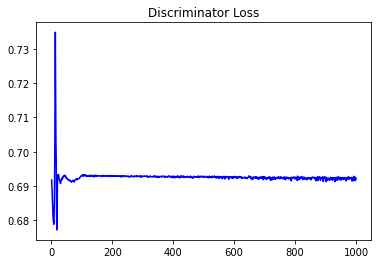

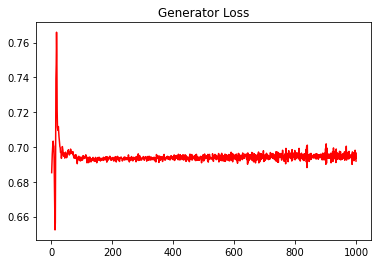

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08811090494500344


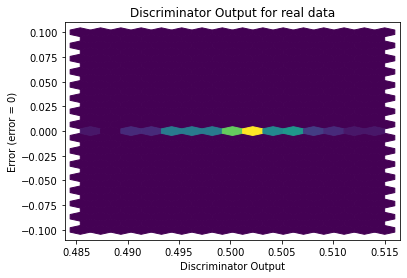

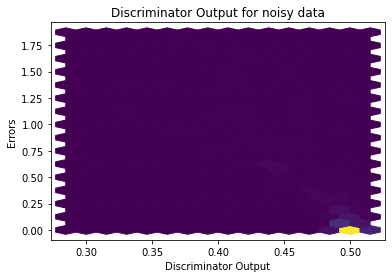

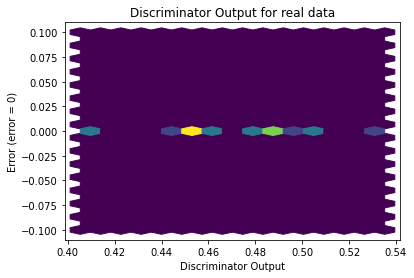

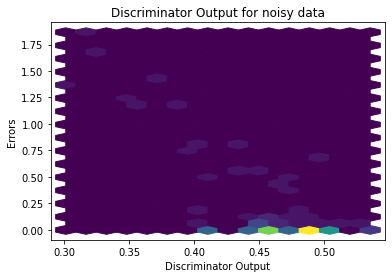

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


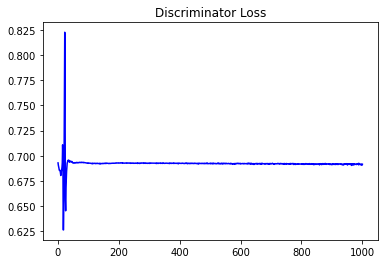

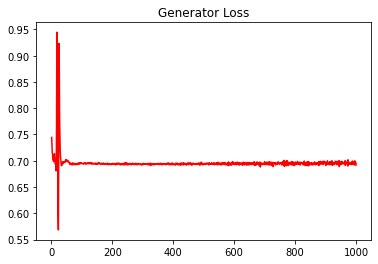

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05766208913599251


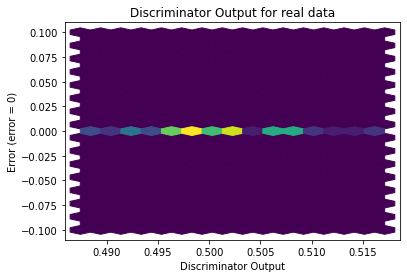

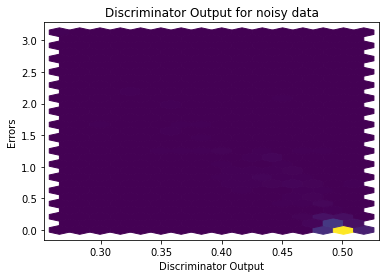

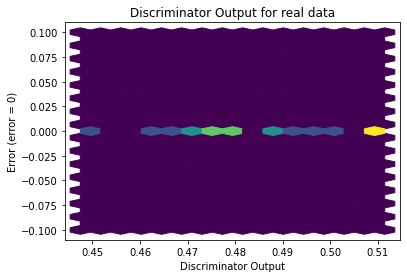

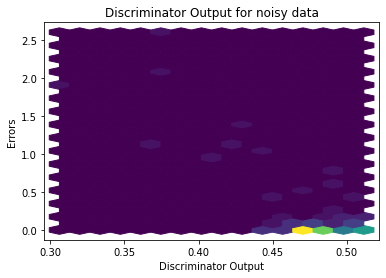

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4752]], requires_grad=True)
